In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

C:\Users\Saket Ranjan\AppData\Local\Temp\ipykernel_956\2080034654.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
df =pd.read_csv("height-weight.csv")
df

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160
5,78,162
6,80,163
7,90,175
8,95,182
9,78,170


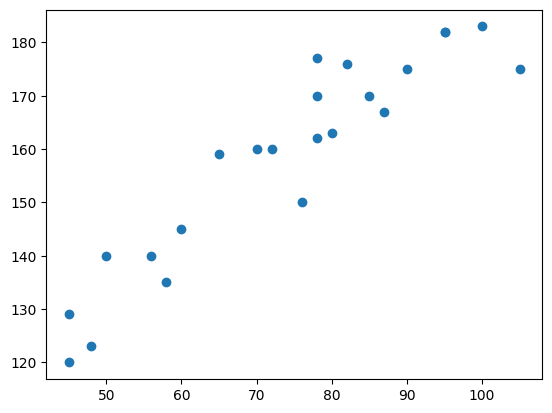

In [6]:
plt.scatter(df.Weight,df.Height)

In [7]:
#divide the data into X,Y
x=df[["Weight"]]
y=df["Height"]

In [8]:
x

,Weight
0,45
1,58
2,48
3,60
4,70
5,78
6,80
7,90
8,95
9,78


In [9]:
y

0     120
1     135
2     123
3     145
4     160
5     162
6     163
7     175
8     182
9     170
10    176
11    182
12    175
13    183
14    170
15    177
16    140
17    159
18    150
19    167
20    129
21    140
22    160
Name: Height, dtype: int64

In [12]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [14]:
x_train

,Weight
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78
22,72


In [15]:
y_train

4     160
2     123
18    150
6     163
7     175
1     135
14    170
0     120
15    177
22    160
21    140
9     170
8     182
12    175
11    182
5     162
Name: Height, dtype: int64

In [16]:
#Scaling
from sklearn.preprocessing import StandardScaler

In [17]:
scaler=StandardScaler()

In [18]:
x_train

,Weight
4,70
2,48
18,76
6,80
7,90
1,58
14,85
0,45
15,78
22,72


In [19]:
#train >>fit and transform
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

In [20]:
x_train

array([[-0.33596868],
       [-1.6647437 ],
       [ 0.0264245 ],
       [ 0.26801996],
       [ 0.8720086 ],
       [-1.06075505],
       [ 0.57001428],
       [-1.84594029],
       [ 0.14722223],
       [-0.21517095],
       [-1.18155278],
       [ 0.14722223],
       [ 1.17400292],
       [ 1.77799157],
       [ 1.17400292],
       [ 0.14722223]])

In [21]:
x_test

array([[-1.84594029],
       [-0.637963  ],
       [-0.93995732],
       [ 1.47599724],
       [ 0.69081201],
       [-1.54394597],
       [ 0.38881769]])

In [22]:
#model training
from sklearn.linear_model import LinearRegression


In [25]:
reg=LinearRegression()

In [26]:
reg

LinearRegression()

In [27]:
reg.fit(x_train,y_train)

LinearRegression()

In [28]:
print("The coef is",reg.coef_)
print("The intercept is",reg.intercept_)

The coef is [17.96866211]
The intercept is 159.0


In [29]:
#y_pred = intercept + coef(x)
#159+x_train*17

In [30]:
reg.predict(x_train)

array([152.96309227, 129.08678304, 159.47481297, 163.8159601 ,
       174.66882793, 139.93965087, 169.24239401, 125.83092269,
       161.64538653, 155.13366584, 137.76907731, 161.64538653,
       180.09526185, 190.94812968, 180.09526185, 161.64538653])

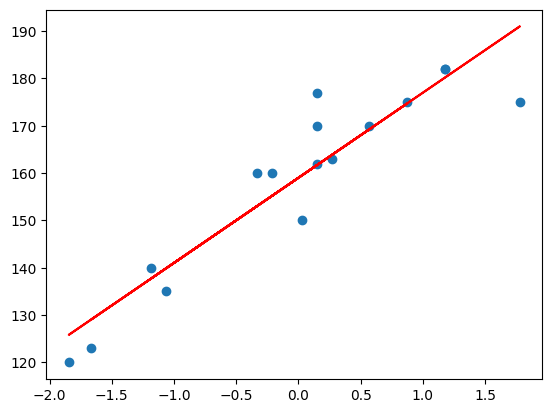

In [33]:
plt.scatter(x_train,y_train)
plt.plot(x_train,reg.predict(x_train),'r')

In [34]:
y_pred_test = reg.predict(x_test)

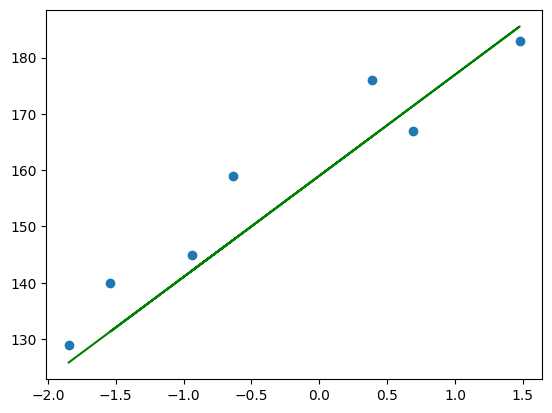

In [37]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred_test,'g')

In [45]:
#evaluation matric
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [42]:
mean_squared_error(y_test,y_pred_test)

50.33408704814381

In [43]:
mean_absolute_error(y_test,y_pred_test)

6.173281083006771

In [44]:
np.sqrt(mean_squared_error(y_test,y_pred_test))

7.09465200331516

In [47]:
r2_score(y_test,y_pred_test) #85% of y is explained by x

0.850577349729853

In [49]:
#adj rsquare
score = r2_score(y_test,y_pred_test)

In [50]:
score

0.850577349729853

In [51]:
y_test

20    129
17    159
3     145
13    183
19    167
16    140
10    176
Name: Height, dtype: int64

In [54]:
x_test.shape[1]

1

In [57]:
1-(1-score)*(len(y_test)-1)/(len(y_test)- x_test.shape[1]-1)

0.8206928196758236